# Neural Network with Tensorflow + Keras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
TRAINING_DIR = r"C:\Users\Karin\Desktop\ML\Final Project\CheckData"
CATEGORIES = ["Train164", "Train165","Train189","Train199","Train601"]

for category in CATEGORIES:
    path = os.path.join(TRAINING_DIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break
    break

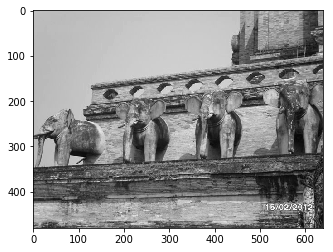

In [3]:
plt.imshow(img_array, cmap="gray")
plt.show()

In [4]:
print ("shape :", img_array.shape)
print (img_array)

shape : (480, 640)
[[198 198 198 ... 160 159 159]
 [197 197 197 ... 162 163 165]
 [196 196 196 ... 159 160 164]
 ...
 [139 150 156 ...  62  58  70]
 [157 160 164 ...  64  59  69]
 [139 135 137 ...  71  62  64]]


In [5]:
# Create train and test sets
IMG_SIZE = 50
training_set = []

def create_training_set():
    for category in CATEGORIES:
        path = os.path.join(TRAINING_DIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array= cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_set.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_set()
print (len(training_set))

2577


In [6]:
import random

random.shuffle(training_set)

In [7]:
for sample in training_set[:10]:
    print(sample[1])

1
2
1
2
3
0
1
2
1
1


In [8]:
X = []
Y = []

for features, label in training_set:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print(X[0].shape)

(50, 50, 1)


In [9]:
import pickle 

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(Y, pickle_out)
pickle_out.close()

In [10]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

In [11]:
X[1]

array([[[164],
        [166],
        [169],
        ...,
        [  6],
        [  8],
        [  9]],

       [[168],
        [170],
        [173],
        ...,
        [  7],
        [  8],
        [  9]],

       [[171],
        [173],
        [176],
        ...,
        [  7],
        [  8],
        [  9]],

       ...,

       [[ 74],
        [ 75],
        [ 70],
        ...,
        [ 87],
        [ 83],
        [ 82]],

       [[ 57],
        [ 58],
        [ 58],
        ...,
        [ 85],
        [ 78],
        [ 83]],

       [[ 56],
        [ 63],
        [ 60],
        ...,
        [ 77],
        [ 74],
        [ 77]]], dtype=uint8)

# Training a conv network with the data

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
import pickle

In [13]:
pickle_in = open("X.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y = pickle.load(pickle_in)

In [14]:
X = X/255.0
print(X[0])

[[[0.80784314]
  [0.81568627]
  [0.81960784]
  ...
  [0.80392157]
  [0.78823529]
  [0.8       ]]

 [[0.80392157]
  [0.81960784]
  [0.82745098]
  ...
  [0.8       ]
  [0.78431373]
  [0.79607843]]

 [[0.76470588]
  [0.78039216]
  [0.80392157]
  ...
  [0.78431373]
  [0.78039216]
  [0.78431373]]

 ...

 [[0.60784314]
  [0.61568627]
  [0.61568627]
  ...
  [0.48235294]
  [0.49411765]
  [0.4745098 ]]

 [[0.57254902]
  [0.6       ]
  [0.58823529]
  ...
  [0.47058824]
  [0.50196078]
  [0.39607843]]

 [[0.43529412]
  [0.43529412]
  [0.48235294]
  ...
  [0.45882353]
  [0.42352941]
  [0.4745098 ]]]


In [15]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

Instructions for updating:
Colocations handled automatically by placer.


In [16]:
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatening the data
model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

#output layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
__________

In [18]:
adamOptimizer = tf.keras.optimizers.Adam(lr=0.001)

model.compile(loss = 'sparse_categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [19]:
import time

class TrainValTensorBoard(TensorBoard):
    def __init__(self, log_dir='./logs', **kwargs):
        NAME = "landmarks-ccn-64x2-{}".format(int(time.time()))
        # Make the original `TensorBoard` log to a subdirectory 'training'
        training_log_dir = os.path.join(log_dir, "%s_%s" % (NAME,"Training"))
        super(TrainValTensorBoard, self).__init__(training_log_dir, **kwargs)

        # Log the validation metrics to a separate subdirectory
        self.val_log_dir = os.path.join(log_dir, "%s_%s" % (NAME,'validation'))

    def set_model(self, model):
        # Setup writer for validation metrics
        self.val_writer = tf.summary.FileWriter(self.val_log_dir)
        super(TrainValTensorBoard, self).set_model(model)

    def on_epoch_end(self, epoch, logs=None):
        # Pop the validation logs and handle them separately with
        # `self.val_writer`. Also rename the keys so that they can
        # be plotted on the same figure with the training metrics
        logs = logs or {}
        val_logs = {k.replace('val_', 'epoch_'): v for k, v in logs.items() if k.startswith('val_')}
        for name, value in val_logs.items():
            summary = tf.Summary()
            summary_value = summary.value.add()
            summary_value.simple_value = value.item()
            summary_value.tag = name
            self.val_writer.add_summary(summary, epoch)
        self.val_writer.flush()

        # Pass the remaining logs to `TensorBoard.on_epoch_end`
        logs = {k: v for k, v in logs.items() if not k.startswith('val_')}
        super(TrainValTensorBoard, self).on_epoch_end(epoch, logs)

    def on_train_end(self, logs=None):
        super(TrainValTensorBoard, self).on_train_end(logs)
        self.val_writer.close()

In [20]:
model.fit(X, Y, batch_size=32, epochs = 3, validation_split=0.1, callbacks=[TrainValTensorBoard(write_graph=False)])

Train on 2319 samples, validate on 258 samples
Epoch 1/3
2319/2319 [==============================] - 12s 5ms/sample - loss: 1.1015 - acc: 0.6016 - val_loss: 0.8132 - val_acc: 0.6822
Epoch 2/3
2319/2319 [==============================] - 11s 5ms/sample - loss: 0.7903 - acc: 0.6800 - val_loss: 0.6261 - val_acc: 0.7752
Epoch 3/3
2319/2319 [==============================] - 12s 5ms/sample - loss: 0.6424 - acc: 0.7611 - val_loss: 0.5077 - val_acc: 0.8140


In [21]:
train_loss, train_acc = model.evaluate(X,Y)

2577/2577 [==============================] - 13s 5ms/sample - loss: 0.5193 - acc: 0.79630s - loss: 0.5225 - acc: 0.79


# Using TensorBoard

In [23]:
import random

IMG_SIZE = 50  #Setting the constant size of each image
training_data = []
for category in CATEGORIES:
    count = 0;                
    path = os.path.join(TRAINING_DIR, category)  # path to cats or dogs dir
    class_num = CATEGORIES.index(category)  #setting that 0 is a dog and 1 is a cat
    for img in os.listdir(path):
        count = count + 1;               # increase the image count
        try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            training_data.append([img_array, class_num])
        except Exception as e:
            pass   # do nothing
        if count == 5:
            break;
        

random.shuffle(training_data)
testPairs = training_data

process_test =[cv2.resize(pair[0], (IMG_SIZE, IMG_SIZE))/255.0 for pair in testPairs] # resizing the images
test_labels = [pair[1] for pair in testPairs]
process_test= np.array(process_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   # resize the array for the model
predictions = model.predict(process_test)

In [24]:
print(len(testPairs))

25


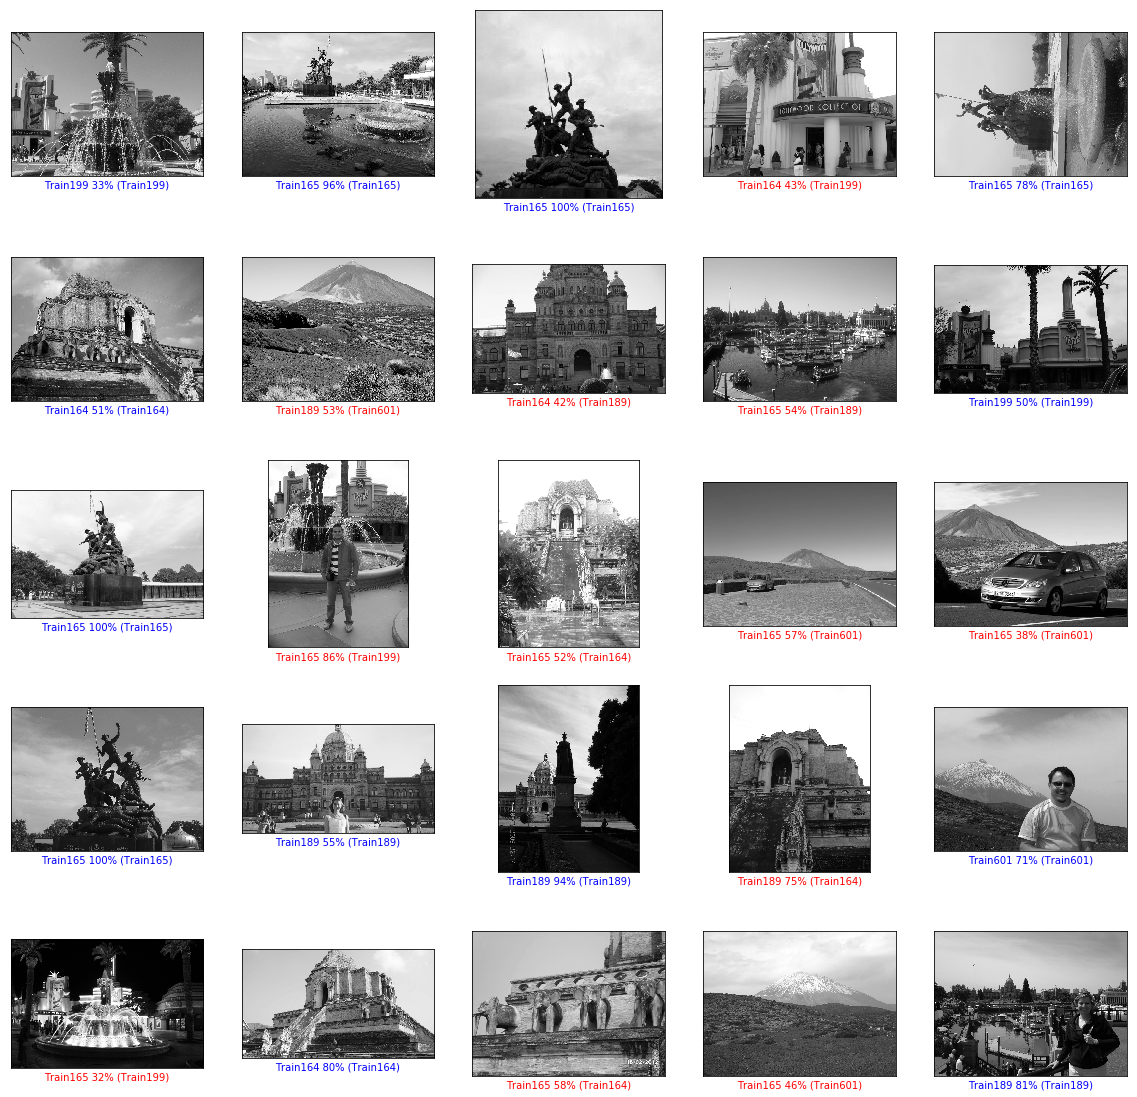

In [25]:
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap='gray')

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(CATEGORIES[predicted_label],
                                100*np.max(predictions_array),
                                CATEGORIES[true_label]),
                                color=color)

num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plot_image(i, predictions, test_labels, [pair[0] for pair in testPairs])

In [26]:
from tensorflow.keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
model = load_model('my_model.h5')

In [30]:
train_loss, train_acc = model.evaluate(X,Y)

2577/2577 [==============================] - 14s 6ms/sample - loss: 0.5193 - acc: 0.7963


In [31]:
print("loss: ",train_loss, "acc: ",  train_acc)

loss:  0.5193212408056359 acc:  0.7962747


In [32]:
print ("Yayyyyyy")

Yayyyyyy
